In [110]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.colors as colors
import h5py
import nbimporter
from _create_pdf import create_spins;
from _helper_functions import tsallis, cauchy, find_nearest_index;
from _steady_state import a_steady;
#%qtconsole

In [155]:
gcoll = 10*2*np.pi #HWHM
q = 1.39
quali = 3000
fr = 3.2981e3;
kappa = np.pi*fr/quali #HWHM
delta = 0*2*np.pi #detuning cavity to spin central frequency ws-wc
deltac = 0*2*np.pi #detuning drive to cavity wc-wp
gperp = 2*np.pi*0.0208 #HWHM
gpar = 2*np.pi*.0001#0.001 #HWHM
gammaq = 2*np.pi*9.4 #FWHM
nbins = 7001#701#5000#20
#g0 = gcoll/sqrt(nspins)
print(kappa)

3.453762243601499


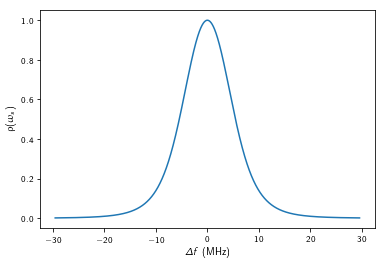

In [156]:
spins, gs, pdf = create_spins(gcoll, q, delta, gammaq, nbins, holes=False, inhomo=True, hyperfine=True)

plt.figure()
plt.plot(spins, pdf/max(pdf))
plt.xlabel('$\Delta f$ (MHz)')
plt.ylabel('$\\rho(\omega_s)$');

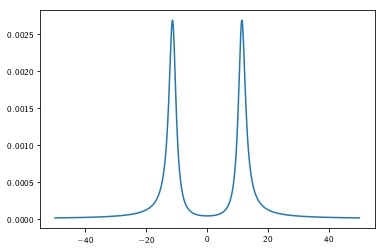

In [157]:
initsteady = (0.1,0.1)
fstart = 50
deltaarr = np.linspace(-fstart*2*np.pi,fstart*2*np.pi, 2000)
etasteady = 0.00001
losasteady = np.zeros(np.shape(deltaarr))
losareal = np.zeros(np.shape(deltaarr))
losaimag = np.zeros(np.shape(deltaarr))

newinit = initsteady
for i, delt in enumerate(deltaarr):
    ar, ai = a_steady(etasteady, delt, gs, spins, gpar, gperp, kappa, newinit)
    newinit = (ar, ai)
    losasteady[i] = ai**2+ar**2
    losareal[i] = ar
    losaimag[i] = ai

fig = plt.figure()
plt.plot(deltaarr/2/np.pi, (losasteady/0.0000000001))
#deltaarr[find(losasteady == max(losasteady))]/2/pi

In [343]:
initsteady = (0.1,0.1)
delt = 0
etaarr = np.logspace(-2, 2, num=500)
gcollarr = np.linspace(0.5*2*np.pi, 20*2*np.pi, 100)
a2arr = np.logspace(-5, 2, num=2000)
losarr = np.zeros((len(gcollarr), len(a2arr)))
coops = np.zeros(len(gcollarr))
idx = []

def computeeta2(a2, deltac, g, spins, gpar, gperp, kappa):
    ret1 = 2*gpar*(gpar+2*gperp)*g**2
    ret2 = 8*a2*(gpar+2*gperp)**2*g**2
    ret3 = gpar*((gpar+2*gperp)**2+4*spins**2)
    return a2*(kappa+np.sum(ret1/(ret2+ret3)))**2


for j, g in enumerate(gcollarr):
    spinstemp, gstemp, pdftemp = create_spins(g, q, delta, gammaq, nbins, holes=False, inhomo=True, hyperfine=True)
    for i, a2 in enumerate(a2arr):
        losarr[j, i] = computeeta2(a2, deltac, gstemp, spinstemp, 0.01, 0.3, kappa)
    trans = a2arr/losarr[j,:]
    ccoll = np.sqrt(trans[-1]/trans[0])-1
    coops[j] = ccoll
    ind = where(abs(gradient(gradient(log10(losarr[j,20:-20]))))==abs(gradient(gradient(log10(losarr[j,20:-20])))).min())[0]
    idx.append(int(ind))

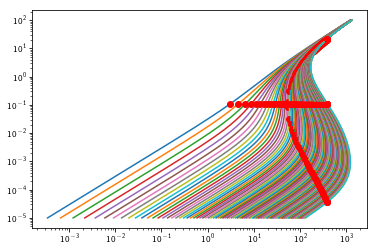

In [356]:
zero_corssings = np.zeros((len(losarr), 3))*np.nan
for i, arr in enumerate(losarr):
    loglog(arr, a2arr)
    
    zeros = numpy.where(numpy.diff(numpy.sign(arr-arr[ind]+0.00000000001)))[0]
    for l, z in enumerate(zeros):
        zero_corssings[i, l] = a2arr[z]
        loglog(arr[z], a2arr[z], 'ro')

        


In [ ]:

np.gr


